# Regression Outputs

In [101]:
from IPython.display import HTML, display
import numpy as np
import pandas as pd

import statsmodels.api as sm
from statsmodels.formula.api import ols
#from statsmodels.sandbox.regression.predstd import wls_prediction_std

import seaborn as sns
sns.set_style("darkgrid")

## Model 1: characteristics only

### HK Cities dataset

/var/folders/5h/0pnj053913z2cl2pgkgr888h0000gp/T/ipykernel_3420/2718768163.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  hk_characteristics = pd.read_csv('./Data/Cleaned-Datasets/HK_cities_cleaned.csv')


                            OLS Regression Results                            
Dep. Variable:              kaufpreis   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     9534.
Date:                Mon, 01 May 2023   Prob (F-statistic):               0.00
Time:                        20:19:12   Log-Likelihood:            -1.4639e+06
No. Observations:              105944   AIC:                         2.928e+06
Df Residuals:                  105934   BIC:                         2.928e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.093e+05   3

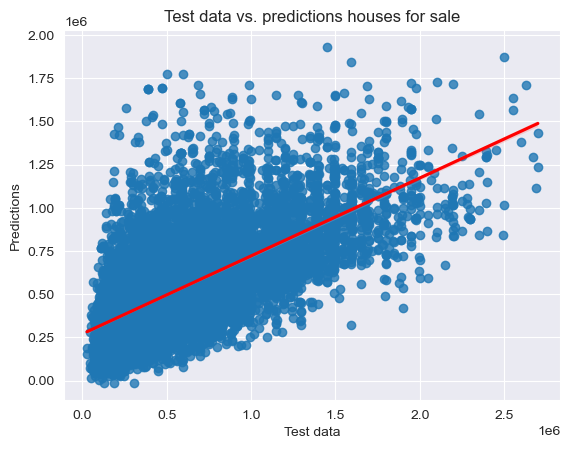

In [102]:
hk_characteristics = pd.read_csv('./Data/Cleaned-Datasets/HK_cities_cleaned.csv')
df_hk_characteristics = pd.DataFrame(hk_characteristics)

X = df_hk_characteristics[['wohnflaeche', 'grundstuecksflaeche', 'zimmeranzahl', 'schlafzimmer', 'badezimmer','keller', 'parkplatz', 'age', 'objektzustand']]
Y = df_hk_characteristics['kaufpreis']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

#print('Intercept:')
#print(model.intercept_)

coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
#print(coeff_parameter)

predictions = model.predict(X_test)

regplot = sns.regplot(x=y_test, y=predictions, line_kws={'color': 'red'})
regplot.set(title='Test data vs. predictions houses for sale', xlabel='Test data', ylabel='Predictions')
regplot

X_train_Sm= sm.add_constant(X_train)
hk_ls=sm.OLS(y_train,X_train_Sm).fit()
print(hk_ls.summary())

### WK cities dataset

/var/folders/5h/0pnj053913z2cl2pgkgr888h0000gp/T/ipykernel_3420/3199893145.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  wk_characteristics = pd.read_csv('./Data/Cleaned-Datasets/WK_cities_cleaned.csv')


                            OLS Regression Results                            
Dep. Variable:              kaufpreis   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                 4.237e+04
Date:                Mon, 01 May 2023   Prob (F-statistic):               0.00
Time:                        20:19:33   Log-Likelihood:            -4.5200e+06
No. Observations:              334231   AIC:                         9.040e+06
Df Residuals:                  334223   BIC:                         9.040e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.233e+05   1355.361    -90.942

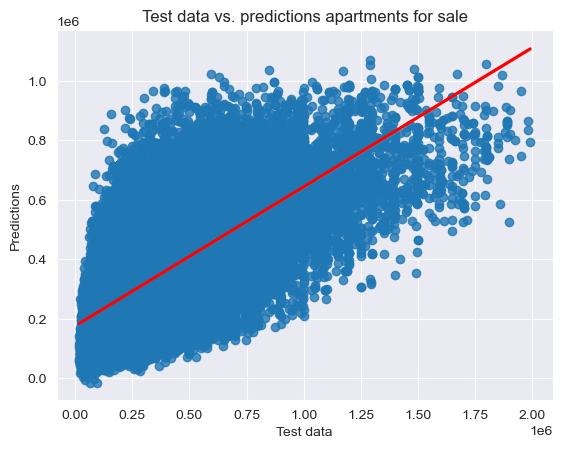

In [103]:
wk_characteristics = pd.read_csv('./Data/Cleaned-Datasets/WK_cities_cleaned.csv')
df_wk_characteristics = pd.DataFrame(wk_characteristics)

X = df_wk_characteristics[['wohnflaeche', 'zimmeranzahl', 'schlafzimmer', 'badezimmer', 'aufzug', 'age', 'objektzustand']]
Y = df_wk_characteristics['kaufpreis']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

#print('Intercept:')
#print(model.intercept_)

coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
#print(coeff_parameter)

predictions = model.predict(X_test)

regplot = sns.regplot(x=y_test, y=predictions, line_kws={'color': 'red'})
regplot.set(title='Test data vs. predictions apartments for sale', xlabel='Test data', ylabel='Predictions')
regplot

X_train_Sm= sm.add_constant(X_train)
wk_ls = sm.OLS(y_train,X_train_Sm).fit()
print(wk_ls.summary())

In [104]:
from stargazer.stargazer import Stargazer
stargazer_tab = Stargazer([hk_ls, wk_ls])
stargazer_tab.custom_columns(['House prices', 'Apartment prices'], [1, 1])
stargazer_tab.significant_digits(2)
#stargazer_tab.title('Model 1')
stargazer_tab.covariate_order(['const', 'age', 'wohnflaeche', 'zimmeranzahl', 'grundstuecksflaeche', 'schlafzimmer', 'badezimmer', 'parkplatz', 'keller', 'aufzug', 'objektzustand'])
stargazer_tab.rename_covariates({
    'age': 'Age', 
    'badezimmer': 'Number of bathrooms', 
    'const': 'Intercept', 
    'grundstuecksflaeche': 'Land area',
    'keller': 'Cellar', 
    'objektzustand': 'Object condition', 
    'parkplatz': 'Parkingspace', 
    'schlafzimmer': 'Number of bedrooms', 
    'wohnflaeche': 'Living space', 
    'zimmeranzahl': 'Number of rooms', 
    'aufzug': 'Elevator'
    })
open('./Regression-Output/model-1.tex', 'w').write(stargazer_tab.render_latex())
stargazer_tab

## Model 2: macroeconomic factors only

### HK cities dataset

                            OLS Regression Results                            
Dep. Variable:              kaufpreis   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     1163.
Date:                Mon, 01 May 2023   Prob (F-statistic):          2.99e-116
Time:                        20:19:34   Log-Likelihood:                -1773.0
No. Observations:                 153   AIC:                             3558.
Df Residuals:                     147   BIC:                             3576.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

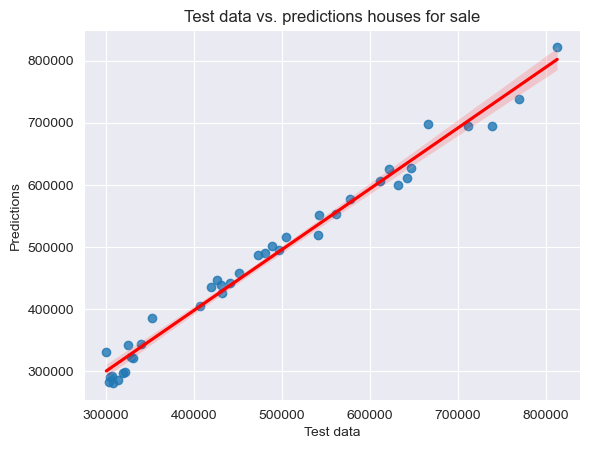

In [105]:
hk_macro_factors = pd.read_csv('./Data/Cleaned-Datasets/HK_macro_factors_cleaned.csv')
df_hk_macro_factors = pd.DataFrame(hk_macro_factors)

X = df_hk_macro_factors[['interest_rate', 'Erwerbslosenquote', 'housing_construction_investment', 'disposable_income', 'BIP_pro_kopf']]
Y = df_hk_macro_factors['kaufpreis']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

model = LinearRegression()
model.fit(X_train,y_train)

#print('Intercept:')
#print(model.intercept_)

coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
#print(coeff_parameter)

predictions = model.predict(X_test)
regplot = sns.regplot(x=y_test, y=predictions, line_kws={'color': 'red'})
regplot.set(title='Test data vs. predictions houses for sale', xlabel='Test data', ylabel='Predictions')
regplot

X_train_Sm= sm.add_constant(X_train)
hk_ls=sm.OLS(y_train,X_train_Sm, missing='raise').fit()
print(hk_ls.summary())

### WK cities dataset

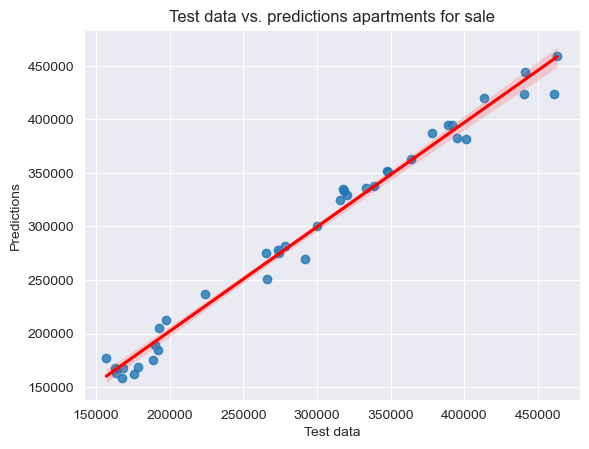

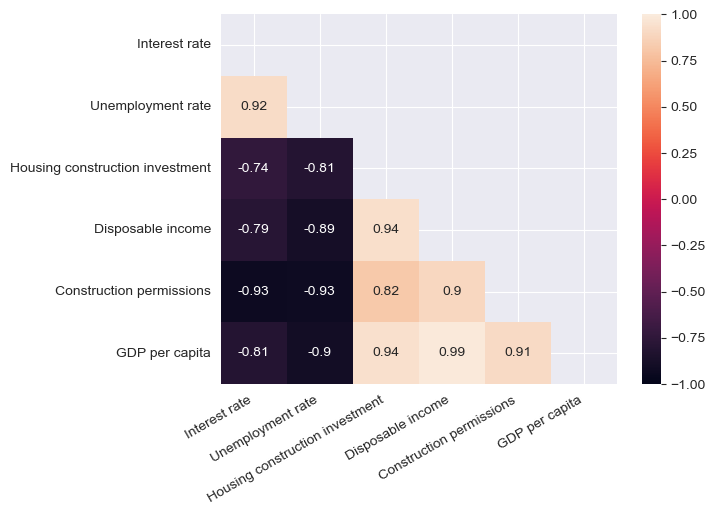

                            OLS Regression Results                            
Dep. Variable:              kaufpreis   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1436.
Date:                Mon, 01 May 2023   Prob (F-statistic):          4.04e-127
Time:                        20:19:34   Log-Likelihood:                -1666.2
No. Observations:                 153   AIC:                             3346.
Df Residuals:                     146   BIC:                             3368.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [106]:
wk_macro_factors = pd.read_csv('./Data/Cleaned-Datasets/WK_macro_factors_cleaned.csv')
df_wk_macro_factors = pd.DataFrame(wk_macro_factors)

X = df_wk_macro_factors[['interest_rate', 'Erwerbslosenquote', 'housing_construction_investment', 'disposable_income', 'Baugenehmigungen', 'BIP_pro_kopf']]
Y = df_wk_macro_factors['kaufpreis']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

model = LinearRegression()
model.fit(X_train,y_train)

#print('Intercept:')
#print(model.intercept_)

coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
#print(coeff_parameter)

predictions = model.predict(X_test)
regplot = sns.regplot(x=y_test, y=predictions, line_kws={'color': 'red'})
regplot.set(title='Test data vs. predictions apartments for sale', xlabel='Test data', ylabel='Predictions')
import matplotlib.pyplot as plt
plt.show()

mask = np.triu(np.ones_like(X.corr(), dtype=bool))
x_axis_labels = ['Interest rate', 'Unemployment rate', 'Housing construction investment', 'Disposable income', 'Construction permissions', 'GDP per capita']
y_axis_labels = ['Interest rate', 'Unemployment rate', 'Housing construction investment', 'Disposable income', 'Construction permissions', 'GDP per capita']
sns.heatmap(X.corr(), annot=True,  mask=mask, xticklabels=x_axis_labels, yticklabels=y_axis_labels, vmin=-1, vmax=1)
plt.xticks(rotation=30, ha='right')
plt.show()


X_train_Sm= sm.add_constant(X_train)
wk_ls=sm.OLS(y_train,X_train_Sm, missing='raise').fit()
print(wk_ls.summary())

In [107]:
stargazer_tab = Stargazer([hk_ls, wk_ls])
stargazer_tab.custom_columns(['House prices', 'Apartment prices'], [1, 1])
stargazer_tab.significant_digits(2)
stargazer_tab.covariate_order(['const', 'interest_rate', 'Erwerbslosenquote', 'disposable_income', 'housing_construction_investment', 'Baugenehmigungen', 'BIP_pro_kopf'])
stargazer_tab.rename_covariates({
    'interest_rate': 'Interest rate', 
    'Erwerbslosenquote': 'Unemployment rate', 
    'const': 'Intercept', 
    'disposable_income': 'Disposable income',
    'housing_construction_investment': 'Investment in housing construction', 
    'Baugenehmigungen': 'Number of construction permissions', 
    'BIP_pro_kopf': 'GDP per capita'
    })
open('./Regression-Output/model-2.tex', 'w').write(stargazer_tab.render_latex())
stargazer_tab

## Model 3: characteristics and macroeconomic factors combines

### HK cities dataset

/var/folders/5h/0pnj053913z2cl2pgkgr888h0000gp/T/ipykernel_3420/3428513783.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  hk_both_factors = pd.read_csv('./Data/Cleaned-Datasets/HK_both_factors_cleaned.csv')


                            OLS Regression Results                            
Dep. Variable:              kaufpreis   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                 1.015e+04
Date:                Mon, 01 May 2023   Prob (F-statistic):               0.00
Time:                        20:19:41   Log-Likelihood:            -1.4503e+06
No. Observations:              105944   AIC:                         2.901e+06
Df Residuals:                  105929   BIC:                         2.901e+06
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

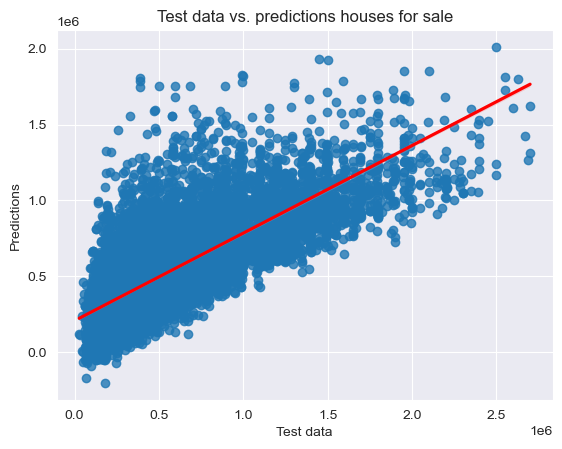

In [108]:
hk_both_factors = pd.read_csv('./Data/Cleaned-Datasets/HK_both_factors_cleaned.csv')
df_hk_both_factors = pd.DataFrame(hk_both_factors)

X = df_hk_both_factors[['interest_rate', 'Erwerbslosenquote', 'disposable_income', 'housing_construction_investment', 'BIP_pro_kopf', 'wohnflaeche', 'grundstuecksflaeche', 'zimmeranzahl', 'schlafzimmer', 'badezimmer', 'keller', 'parkplatz', 'age','objektzustand']]
Y = df_hk_both_factors['kaufpreis']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

model = LinearRegression()
model.fit(X_train,y_train)

#print('Intercept:')
#print(model.intercept_)

coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
#print(coeff_parameter)

predictions = model.predict(X_test)
regplot = sns.regplot(x=y_test, y=predictions, line_kws={'color': 'red'})
regplot.set(title='Test data vs. predictions houses for sale', xlabel='Test data', ylabel='Predictions')
regplot

X_train_Sm= sm.add_constant(X_train)
hk_ls=sm.OLS(y_train,X_train_Sm).fit()
print(hk_ls.summary())

### WK cities dataset

/var/folders/5h/0pnj053913z2cl2pgkgr888h0000gp/T/ipykernel_3420/3147363126.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  wk_both_factors = pd.read_csv('./Data/Cleaned-Datasets/WK_both_factors_cleaned.csv')


                            OLS Regression Results                            
Dep. Variable:              kaufpreis   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                 4.525e+04
Date:                Mon, 01 May 2023   Prob (F-statistic):               0.00
Time:                        20:20:02   Log-Likelihood:            -4.4565e+06
No. Observations:              334231   AIC:                         8.913e+06
Df Residuals:                  334217   BIC:                         8.913e+06
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

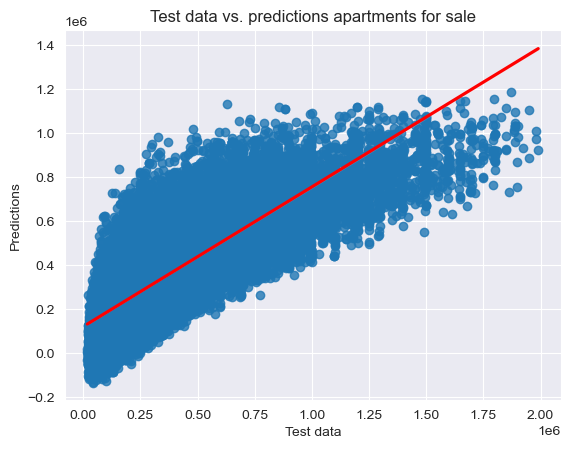

In [109]:
wk_both_factors = pd.read_csv('./Data/Cleaned-Datasets/WK_both_factors_cleaned.csv')
df_wk_both_factors = pd.DataFrame(wk_both_factors)

X = df_wk_both_factors[['interest_rate', 'Erwerbslosenquote', 'disposable_income', 'housing_construction_investment', 'Baugenehmigungen', 'BIP_pro_kopf', 'wohnflaeche', 'zimmeranzahl', 'schlafzimmer','badezimmer', 'aufzug', 'age', 'objektzustand']]
Y = df_wk_both_factors['kaufpreis']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

model = LinearRegression()
model.fit(X_train,y_train)

#print('Intercept:')
#print(model.intercept_)

coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
#print(coeff_parameter)

predictions = model.predict(X_test)
regplot = sns.regplot(x=y_test, y=predictions, line_kws={'color': 'red'})
regplot.set(title='Test data vs. predictions apartments for sale', xlabel='Test data', ylabel='Predictions')
regplot

X_train_Sm= sm.add_constant(X_train)
wk_ls=sm.OLS(y_train,X_train_Sm).fit()
print(wk_ls.summary())

In [110]:
stargazer_tab = Stargazer([hk_ls, wk_ls])
stargazer_tab.custom_columns(['House prices', 'Apartment prices'], [1, 1])
stargazer_tab.significant_digits(2)
stargazer_tab.covariate_order(['const', 'interest_rate', 'Erwerbslosenquote', 'disposable_income', 'housing_construction_investment', 'Baugenehmigungen', 'BIP_pro_kopf', 'age', 'wohnflaeche', 'zimmeranzahl', 'grundstuecksflaeche', 'schlafzimmer', 'badezimmer', 'parkplatz', 'keller', 'aufzug', 'objektzustand'])
stargazer_tab.rename_covariates({
    'interest_rate': 'Interest rate', 
    'Erwerbslosenquote': 'Unemployment rate', 
    'const': 'Intercept', 
    'disposable_income': 'Disposable income',
    'housing_construction_investment': 'Investment in housing construction', 
    'Baugenehmigungen': 'Number of construction permissions', 
    'BIP_pro_kopf': 'GDP per capita',
    'age': 'Age', 
    'badezimmer': 'Number of bathrooms', 
    'const': 'Intercept', 
    'grundstuecksflaeche': 'Land area',
    'keller': 'Cellar', 
    'objektzustand': 'Object condition', 
    'parkplatz': 'Parkingspace', 
    'schlafzimmer': 'Number of bedrooms', 
    'wohnflaeche': 'Living space', 
    'zimmeranzahl': 'Number of rooms', 
    'aufzug': 'Elevator'
    })
open('./Regression-Output/model-3.tex', 'w').write(stargazer_tab.render_latex())
stargazer_tab

## Model 4: cross-sectional dataset

### HK cities dataset

                            OLS Regression Results                            
Dep. Variable:              kaufpreis   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     2589.
Date:                Mon, 01 May 2023   Prob (F-statistic):               0.00
Time:                        20:20:06   Log-Likelihood:            -7.4421e+05
No. Observations:               53628   AIC:                         1.488e+06
Df Residuals:                   53612   BIC:                         1.489e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7.696e+05   3

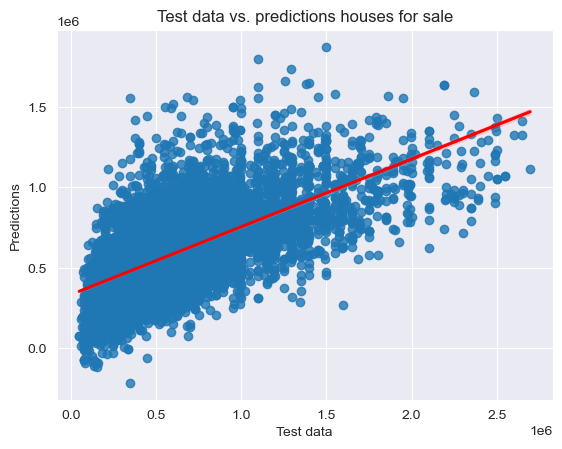

In [111]:
hk_2022 = pd.read_csv('./Data/Cleaned-Datasets/HK_2022_cleaned.csv')
df_hk_2022 = pd.DataFrame(hk_2022)

X = df_hk_2022[['wohnflaeche', 'grundstuecksflaeche', 'zimmeranzahl', 'schlafzimmer', 'badezimmer', 'keller', 'parkplatz', 'age', 'objektzustand', 'einwohner', 'Bevölkerungsdichte', 'Arbeitslosenquote', 'BIP_pro_einwohner', 'Einkommen', 'Leerstandsquote']]
Y = df_hk_2022['kaufpreis']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

model = LinearRegression()
model.fit(X_train,y_train)

#print('Intercept:')
#print(model.intercept_)

coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
#print(coeff_parameter)

predictions = model.predict(X_test)
regplot = sns.regplot(x=y_test, y=predictions, line_kws={'color': 'red'})
regplot.set(title='Test data vs. predictions houses for sale', xlabel='Test data', ylabel='Predictions')
regplot

X_train_Sm= sm.add_constant(X_train)
hk_ls=sm.OLS(y_train,X_train_Sm).fit()
print(hk_ls.summary())

### WK cities dataset

                            OLS Regression Results                            
Dep. Variable:              kaufpreis   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     5925.
Date:                Mon, 01 May 2023   Prob (F-statistic):               0.00
Time:                        20:20:10   Log-Likelihood:            -7.2040e+05
No. Observations:               53710   AIC:                         1.441e+06
Df Residuals:                   53697   BIC:                         1.441e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4.266e+05   2.85

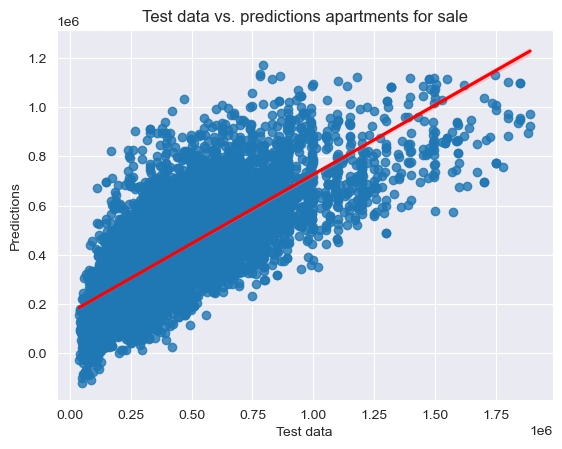

In [112]:
wk_2022 = pd.read_csv('./Data/Cleaned-Datasets/WK_2022_cleaned.csv')
df_wk_2022 = pd.DataFrame(wk_2022)

X = df_wk_2022[['wohnflaeche', 'zimmeranzahl', 'schlafzimmer', 'badezimmer', 'aufzug', 'age', 'objektzustand', 'Bevölkerungsdichte', 'Arbeitslosenquote', 'BIP_pro_einwohner', 'Einkommen', 'Leerstandsquote']]
Y = df_wk_2022['kaufpreis']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

model = LinearRegression()
model.fit(X_train,y_train)

#print('Intercept:')
#print(model.intercept_)

coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
#print(coeff_parameter)

predictions = model.predict(X_test)
regplot = sns.regplot(x=y_test, y=predictions, line_kws={'color': 'red'})
regplot.set(title='Test data vs. predictions apartments for sale', xlabel='Test data', ylabel='Predictions')
regplot

X_train_Sm= sm.add_constant(X_train)
wk_ls = sm.OLS(y_train,X_train_Sm).fit()
print(wk_ls.summary())

In [113]:
stargazer_tab = Stargazer([hk_ls, wk_ls])
stargazer_tab.custom_columns(['House prices', 'Apartment prices'], [1, 1])
stargazer_tab.significant_digits(2)
stargazer_tab.covariate_order(['const', 'Bevölkerungsdichte', 'Arbeitslosenquote', 'BIP_pro_einwohner', 'Einkommen', 'Leerstandsquote', 'age', 'wohnflaeche', 'zimmeranzahl', 'grundstuecksflaeche', 'schlafzimmer', 'badezimmer', 'parkplatz', 'keller', 'aufzug', 'objektzustand'])
stargazer_tab.rename_covariates({
    'Bevölkerungsdichte': 'Population density', 
    'const': 'Intercept', 
    'Arbeitslosenquote': 'Unemployment rate',
    'BIP_pro_einwohner': 'GDP per capita', 
    'Einkommen': 'Income per person', 
    'Leerstandsquote': 'Vacancy rate',
    'age': 'Age', 
    'badezimmer': 'Number of bathrooms', 
    'const': 'Intercept', 
    'grundstuecksflaeche': 'Land area',
    'keller': 'Cellar', 
    'objektzustand': 'Object condition', 
    'parkplatz': 'Parkingspace', 
    'schlafzimmer': 'Number of bedrooms', 
    'wohnflaeche': 'Living space', 
    'zimmeranzahl': 'Number of rooms', 
    'aufzug': 'Elevator'
    })
open('./Regression-Output/model-4.tex', 'w').write(stargazer_tab.render_latex())
stargazer_tab